In [1]:
import pandas as pd
import numpy as np
import csv
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#loading data tables filtered and downloaded at from GHO data repository
directory = "/content/drive/MyDrive/life_expectancy_data"
life_exp_2000 = pd.read_xml(directory + "life_expectancy_2000.xml")
bmi_2000 = pd.read_xml(directory + "bmi_2000.xml")
blood_pressure_2000 = pd.read_xml(directory + "blood_pressure_2000.xml")
glucose_2000 = pd.read_xml(directory + "glucose_2000.xml")
cholesterol_2000 = pd.read_xml(directory + "cholesterol_2000.xml")

In [4]:
#loading data tables filtered and downloaded at from GHO data repository
life_exp_2010 = pd.read_xml(directory + "life_expectancy_2010.xml")
bmi_2010 = pd.read_xml(directory + "bmi_2010.xml")
blood_pressure_2010 = pd.read_xml(directory + "blood_pressure_2010.xml")
glucose_2010 = pd.read_xml(directory + "glucose_2010.xml")
cholesterol_2010 = pd.read_xml(directory + "cholesterol_2010.xml")

In [5]:
#loading data tables filtered and downloaded at from GHO data repository
life_exp_2015 = pd.read_xml(directory + "life_expectancy_2015.xml")
bmi_2015 = pd.read_xml(directory + "bmi_2015.xml")
blood_pressure_2015 = pd.read_xml(directory + "blood_pressure_2015.xml")
glucose_2015 = pd.read_xml(directory + "glucose_2015.xml")
cholesterol_2015 = pd.read_xml(directory + "cholesterol_2015.xml")

In [6]:
life_exp_2000.loc[life_exp_2000["SEX"] == "Male", "SEX"] = 0
life_exp_2000.loc[life_exp_2000["SEX"] == "Female", "SEX"] = 1

bmi_2000.loc[bmi_2000["SEX"] == "Male", "SEX"] = 0
bmi_2000.loc[bmi_2000["SEX"] == "Female", "SEX"] = 1

blood_pressure_2000.loc[blood_pressure_2000["SEX"] == "Male", "SEX"] = 0
blood_pressure_2000.loc[blood_pressure_2000["SEX"] == "Female", "SEX"] = 1

glucose_2000.loc[glucose_2000["SEX"] == "Male", "SEX"] = 0
glucose_2000.loc[glucose_2000["SEX"] == "Female", "SEX"] = 1

cholesterol_2000.loc[cholesterol_2000["SEX"] == "Male", "SEX"] = 0
cholesterol_2000.loc[cholesterol_2000["SEX"] == "Female", "SEX"] = 1

In [7]:
life_exp_2010.loc[life_exp_2010["SEX"] == "Male", "SEX"] = 0
life_exp_2010.loc[life_exp_2010["SEX"] == "Female", "SEX"] = 1

bmi_2010.loc[bmi_2010["SEX"] == "Male", "SEX"] = 0
bmi_2010.loc[bmi_2010["SEX"] == "Female", "SEX"] = 1

blood_pressure_2010.loc[blood_pressure_2010["SEX"] == "Male", "SEX"] = 0
blood_pressure_2010.loc[blood_pressure_2010["SEX"] == "Female", "SEX"] = 1

glucose_2010.loc[glucose_2010["SEX"] == "Male", "SEX"] = 0
glucose_2010.loc[glucose_2010["SEX"] == "Female", "SEX"] = 1

cholesterol_2010.loc[cholesterol_2010["SEX"] == "Male", "SEX"] = 0
cholesterol_2010.loc[cholesterol_2010["SEX"] == "Female", "SEX"] = 1

In [8]:
life_exp_2015.loc[life_exp_2015["SEX"] == "Male", "SEX"] = 0
life_exp_2015.loc[life_exp_2015["SEX"] == "Female", "SEX"] = 1

bmi_2015.loc[bmi_2015["SEX"] == "Male", "SEX"] = 0
bmi_2015.loc[bmi_2015["SEX"] == "Female", "SEX"] = 1

blood_pressure_2015.loc[blood_pressure_2015["SEX"] == "Male", "SEX"] = 0
blood_pressure_2015.loc[blood_pressure_2015["SEX"] == "Female", "SEX"] = 1

glucose_2015.loc[glucose_2015["SEX"] == "Male", "SEX"] = 0
glucose_2015.loc[glucose_2015["SEX"] == "Female", "SEX"] = 1

cholesterol_2015.loc[cholesterol_2015["SEX"] == "Male", "SEX"] = 0
cholesterol_2015.loc[cholesterol_2015["SEX"] == "Female", "SEX"] = 1

In [ ]:
life_exp_2000 = life_exp_2000.drop(columns=["GHO", "YEAR"])
life_exp_2000["Display"] = life_exp_2000["Display"].astype(float)
life_exp_2000.rename(columns = {"Display" : "Life_expectancy"}, inplace = True)

bmi_2000 = bmi_2000.drop(columns = ["GHO", "AGEGROUP", "YEAR", "Note"])
bmi_2000.fillna(method = "bfill", inplace = True)
bmi_2000["Display"] = bmi_2000["Display"].astype(str)
for i in range(len(bmi_2000)):
  bmi_2000["Display"][i] = bmi_2000["Display"][i].split(" ")[0]
bmi_2000["Display"] = bmi_2000["Display"].astype(float)
bmi_2000.rename(columns = {"Display" : "BMI"}, inplace = True)

blood_pressure_2000 = blood_pressure_2000.drop(columns = ["GHO", "AGEGROUP", "YEAR", "Note"])
blood_pressure_2000.fillna(method = "bfill", inplace = True)
blood_pressure_2000["Display"] = blood_pressure_2000["Display"].astype(str)
for i in range(len(blood_pressure_2000)):
  blood_pressure_2000["Display"][i] = blood_pressure_2000["Display"][i].split(" ")[0]
blood_pressure_2000["Display"] = blood_pressure_2000["Display"].astype(float)
blood_pressure_2000.rename(columns = {"Display" : "Blood_pressure"}, inplace = True)

glucose_2000 = glucose_2000.drop(columns = ["GHO", "YEAR"])
for i in range(len(glucose_2000)):
  glucose_2000["Display"][i] = glucose_2000["Display"][i].split(" ")[0]
glucose_2000["Display"] = glucose_2000["Display"].astype(float)
glucose_2000.rename(columns = {"Display" : "Glucose"}, inplace = True)

cholesterol_2000 = cholesterol_2000.drop(columns = ["GHO", "YEAR"])
for i in range(len(cholesterol_2000)):
  cholesterol_2000["Display"][i] = cholesterol_2000["Display"][i].split(" ")[0]
cholesterol_2000["Display"] = cholesterol_2000["Display"].astype(float)
cholesterol_2000.rename(columns = {"Display" : "Cholesterol"}, inplace = True)

In [ ]:
life_exp_2010 = life_exp_2010.drop(columns=["GHO", "YEAR"])
life_exp_2010["Display"] = life_exp_2010["Display"].astype(float)
life_exp_2010.rename(columns = {"Display" : "Life_expectancy"}, inplace = True)

bmi_2010 = bmi_2010.drop(columns = ["GHO", "AGEGROUP", "Note", "YEAR"])
bmi_2010.fillna(method = "bfill", inplace = True)
bmi_2010["Display"] = bmi_2010["Display"].astype(str)
for i in range(len(bmi_2010)):
  bmi_2010["Display"][i] = bmi_2010["Display"][i].split(" ")[0]
bmi_2010["Display"] = bmi_2010["Display"].astype(float)
bmi_2010.rename(columns = {"Display" : "BMI"}, inplace = True)

blood_pressure_2010 = blood_pressure_2010.drop(columns = ["GHO", "AGEGROUP", "Note", "YEAR"])
blood_pressure_2010.fillna(method = "bfill", inplace = True)
blood_pressure_2010["Display"] = blood_pressure_2010["Display"].astype(str)
for i in range(len(blood_pressure_2010)):
  blood_pressure_2010["Display"][i] = blood_pressure_2010["Display"][i].split(" ")[0]
blood_pressure_2010["Display"] = blood_pressure_2010["Display"].astype(float)
blood_pressure_2010.rename(columns = {"Display" : "Blood_pressure"}, inplace = True)

glucose_2010 = glucose_2010.drop(columns = ["GHO", "YEAR"])
for i in range(len(glucose_2010)):
  glucose_2010["Display"][i] = glucose_2010["Display"][i].split(" ")[0]
glucose_2010["Display"] = glucose_2010["Display"].astype(float)
glucose_2010.rename(columns = {"Display" : "Glucose"}, inplace = True)

cholesterol_2010 = cholesterol_2010.drop(columns = ["GHO", "YEAR"])
for i in range(len(cholesterol_2010)):
  cholesterol_2010["Display"][i] = cholesterol_2010["Display"][i].split(" ")[0]
cholesterol_2010["Display"] = cholesterol_2010["Display"].astype(float)
cholesterol_2010.rename(columns = {"Display" : "Cholesterol"}, inplace = True)

In [ ]:
life_exp_2015 = life_exp_2015.drop(columns=["GHO", "YEAR"])
life_exp_2015["Display"] = life_exp_2015["Display"].astype(float)
life_exp_2015.rename(columns = {"Display" : "Life_expectancy"}, inplace = True)

bmi_2015 = bmi_2015.drop(columns = ["GHO", "AGEGROUP", "Note", "YEAR"])
bmi_2015.fillna(method = "bfill", inplace = True)
bmi_2015["Display"] = bmi_2015["Display"].astype(str)
for i in range(len(bmi_2015)):
  bmi_2015["Display"][i] = bmi_2015["Display"][i].split(" ")[0]
bmi_2015["Display"] = bmi_2015["Display"].astype(float)
bmi_2015.rename(columns = {"Display" : "BMI"}, inplace = True)

blood_pressure_2015 = blood_pressure_2015.drop(columns = ["GHO", "AGEGROUP", "Note", "YEAR"])
blood_pressure_2015.fillna(method = "bfill", inplace = True)
blood_pressure_2015["Display"] = blood_pressure_2015["Display"].astype(str)
for i in range(len(blood_pressure_2015)):
  blood_pressure_2015["Display"][i] = blood_pressure_2015["Display"][i].split(" ")[0]
blood_pressure_2015["Display"] = blood_pressure_2015["Display"].astype(float)
blood_pressure_2015.rename(columns = {"Display" : "Blood_pressure"}, inplace = True)

glucose_2015 = glucose_2015.drop(columns = ["GHO", "YEAR"])
for i in range(len(glucose_2015)):
  glucose_2015["Display"][i] = glucose_2015["Display"][i].split(" ")[0]
glucose_2015["Display"] = glucose_2015["Display"].astype(float)
glucose_2015.rename(columns = {"Display" : "Glucose"}, inplace = True)

cholesterol_2015 = cholesterol_2015.drop(columns = ["GHO", "YEAR"])
for i in range(len(cholesterol_2015)):
  cholesterol_2015["Display"][i] = cholesterol_2015["Display"][i].split(" ")[0]
cholesterol_2015["Display"] = cholesterol_2015["Display"].astype(float)
cholesterol_2015.rename(columns = {"Display" : "Cholesterol"}, inplace = True)

In [12]:
dfs_2000 = [blood_pressure_2000, bmi_2000, cholesterol_2000, glucose_2000]

for i in range(len(dfs_2000)):
  life_exp_2000 = life_exp_2000.merge(dfs_2000[i], on = ["COUNTRY", "SEX"])
life_exp_2000 = life_exp_2000.drop(columns = ["COUNTRY"])


In [13]:
dfs_2010 = [blood_pressure_2010, bmi_2010, cholesterol_2010, glucose_2010]

for i in range(len(dfs_2010)):
  life_exp_2010 = life_exp_2010.merge(dfs_2010[i], on = ["COUNTRY", "SEX"])
life_exp_2010 = life_exp_2010.drop(columns = ["COUNTRY"])


In [14]:
dfs_2015 = [blood_pressure_2015, bmi_2015, cholesterol_2015, glucose_2015]

for i in range(len(dfs_2015)):
  life_exp_2015 = life_exp_2015.merge(dfs_2015[i], on = ["COUNTRY", "SEX"])
life_exp_2015 = life_exp_2015.drop(columns = ["COUNTRY"])


In [46]:
dfs = [life_exp_2000, life_exp_2010, life_exp_2015]

df = pd.concat(dfs)
df.reset_index(inplace = True)
df = df.drop(columns = "index")

In [47]:
df["SEX"] = df["SEX"].astype(float)
df["Life_expectancy"] = df["Life_expectancy"].astype(float)
df["Blood_pressure"] = df["Blood_pressure"].astype(float)
df["BMI"] = df["BMI"].astype(float)
df["Glucose"] = df["Glucose"].astype(float)
print(df)

      SEX  Life_expectancy  Blood_pressure   BMI  Cholesterol  Glucose
0     0.0             54.6           124.8  21.1          4.2     5.13
1     1.0             55.4           123.0  21.9          4.2     4.95
2     0.0             70.7           132.3  25.3          5.0     4.97
3     1.0             76.9           128.5  24.8          5.0     4.86
4     0.0             70.9           127.5  23.2          4.3     5.31
...   ...              ...             ...   ...          ...      ...
1087  1.0             69.6           126.4  23.5          4.5     5.36
1088  0.0             57.9           132.2  20.9          3.7     5.09
1089  1.0             63.0           130.0  23.3          4.0     5.11
1090  0.0             55.7           127.6  21.9          3.8     5.02
1091  1.0             61.0           128.7  24.7          4.0     5.14

[1092 rows x 6 columns]


In [48]:
column_names = [df.columns]

train = df.sample(frac = 0.8, random_state = 4)
test = df.drop(train.index)

train_features = train.copy()
test_features = test.copy()

train_labels = train_features.pop("Life_expectancy")
test_labels = test_features.pop("Life_expectancy")

train_features = train_features.astype(float)
test_features = test_features.astype(float)

In [49]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))

linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units = 50, activation = "relu"),
    layers.Dense(units = 1)
])


linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [50]:
history = linear_model.fit(
    train_features,
    train_labels,
    epochs = 50,
    validation_split = 0.2
)

Epoch 1/50
22/22 [==============================] - 1s 9ms/step - loss: 34.8425 - val_loss: 10.3468
Epoch 2/50
22/22 [==============================] - 0s 4ms/step - loss: 7.6315 - val_loss: 5.8899
Epoch 3/50
22/22 [==============================] - 0s 3ms/step - loss: 5.0085 - val_loss: 5.5101
Epoch 4/50
22/22 [==============================] - 0s 4ms/step - loss: 4.2619 - val_loss: 3.9437
Epoch 5/50
22/22 [==============================] - 0s 4ms/step - loss: 3.9800 - val_loss: 4.5006
Epoch 6/50
22/22 [==============================] - 0s 4ms/step - loss: 4.2344 - val_loss: 4.7245
Epoch 7/50
22/22 [==============================] - 0s 3ms/step - loss: 4.2738 - val_loss: 4.6806
Epoch 8/50
22/22 [==============================] - 0s 4ms/step - loss: 4.0495 - val_loss: 4.2309
Epoch 9/50
22/22 [==============================] - 0s 4ms/step - loss: 3.9847 - val_loss: 5.0495
Epoch 10/50
22/22 [==============================] - 0s 4ms/step - loss: 4.2938 - val_loss: 4.5560
Epoch 11/50
22/22

In [51]:
test_results = linear_model.evaluate(test_features, test_labels)

7/7 [==============================] - 0s 2ms/step - loss: 3.8008


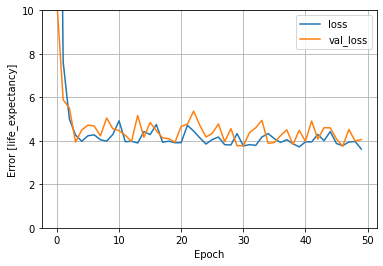

In [52]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [life_expectancy]')
  plt.legend()
  plt.grid(True)

plot_loss(history)

In [57]:
input_array_1 = np.array([0.0, 124.8, 23.2, 4.5, 5.13])
input_array_2 = np.array([1.0, 124.8, 23.2, 4.5, 5.13])
input_array_3 = np.array([0.0, 132.8, 24.2, 4.1, 4.93])
input_array_4 = np.array([1.0, 132.8, 24.2, 4.1, 4.93])

predictions = [0,0,0,0]

predictions[0] = linear_model.predict(input_array_1.reshape(1,5))
predictions[1] = linear_model.predict(input_array_2.reshape(1,5))
predictions[2] = linear_model.predict(input_array_3.reshape(1,5))
predictions[3] = linear_model.predict(input_array_4.reshape(1,5))


print(predictions)

[array([[65.7534]], dtype=float32), array([[69.591324]], dtype=float32), array([[62.27981]], dtype=float32), array([[65.24577]], dtype=float32)]
